In [1]:
# El primer paso es importar pandas y cargar nuestro dataset,
# Se coloca el dataset en la misma carpeta en donde se realizara el codigo

import pandas as pd

In [17]:
import statsmodels as sm
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [19]:
# importamos la bibliotecas para poder realizar los graficos
import numpy as np
import matplotlib.pyplot as plt

In [46]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [28]:
from sklearn.preprocessing import LabelEncoder

In [99]:
#Se carga la base elegida en este caso.
citas = pd.read_excel("/content/CONSULTA ESTADOS TURNOS AGENDADOS_MAYO.xls")


In [100]:
# Se vilualiza las varibles y los datos que tiene la dataset
citas.head (15)

,ESPECIALIDAD,MEDICO,COD_PROCED,NOMBRE_PROCEDIMIENTPO,ESTADO,FECHA_TURNO,HORA_TURNO,DOCUMENTO,CEDULAPACIENTE,NOMBRE_PACIENTE,GRUPO POBLACIONAL,EDAD,TELEFONO,TELEFONO2,TELEFONO3,CORREO_ELECTRONICO,PROVINCIA,FECHA AGENDAMIENTO,HORA DE AGENDAMIENTO
0,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,N,2023-05-08,07:00:00,HCU,1705503603,MARIELLA INES PULIDO HERNANDEZ ...,NO APLICA,68,0960773333,0960773333,0960881111,mariellapulido@gmail.com ...,PICHINCHA,2023-04-14,14:50:20.0
1,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,07:00:00,HCU,1703863496,LUIS ALBERTO SIMBAÑA GOMEZ ...,NO APLICA,70,0959948449,022391446,,Notiene@correo.com ...,PICHINCHA,2023-05-04,14:32:54.0
2,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,07:20:00,HCU,1700104472,MARIA ELVIA LOPEZ LEON ...,NO APLICA,79,0962700910,023455336,,notiene@correo.com ...,PICHINCHA,2023-04-19,14:44:13.0
3,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,07:40:00,HCU,1753715752,JOSELIN NAOMMY GUALOTO ARIAS ...,NO APLICA,21,022832494,NO TIENE,,Notiene@correo.com ...,PICHINCHA,2023-04-20,10:13:50.0
4,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,08:00:00,HCU,0401374889,SHILDA MARIANA ROSERO RAMIREZ ...,NO APLICA,41,0994370932,,,marianarosero@gmail.com\t ...,CARCHI,2023-04-25,12:06:05.0
5,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,08:00:00,HCU,1704527181,AMALIA MAGDALENA COBOS AJILA ...,NO APLICA,66,0984952760,0983532639,,notiene@correo.com ...,PICHINCHA,2023-05-05,13:34:23.0
6,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,08:20:00,HCU,1709102634,DIVINA MARIA LOOR SALDARRIAGA ...,NO APLICA,71,0989579084,0990685482,,Notiene@correo.com ...,PICHINCHA,2023-04-26,12:46:35.0
7,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,08:40:00,HCU,1758583189,ANGELICA MARIA MOLINA GUEVARA ...,NO APLICA,31,0986820204,0983177845,,anglikmolina@gmail.com ...,PICHINCHA,2023-04-26,12:59:27.0
8,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,08:40:00,HCU,0801629130,JOSE NIXON MORANTE VERA ...,NO APLICA,51,0986785770,0993888833,,notiene@correo.com ...,PICHINCHA,2023-05-05,14:02:24.0
9,ANESTESIOLOGÍA ...,CECILIA CARMITA GARCIA PALOMINO,99203-1,CITAS PREQUIRURGICAS ...,A,2023-05-08,09:00:00,HCU,1002033338,ROSA MARITZA SOLANO ...,NO APLICA,50,0994361990,0980229163,,soeiskely@gmail.com ...,IMBABURA,2023-04-27,13:30:35.0


In [101]:
citas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43517 entries, 0 to 43516
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ESPECIALIDAD           43517 non-null  object        
 1   MEDICO                 43517 non-null  object        
 2   COD_PROCED             43517 non-null  object        
 3   NOMBRE_PROCEDIMIENTPO  43517 non-null  object        
 4   ESTADO                 43517 non-null  object        
 5   FECHA_TURNO            43517 non-null  datetime64[ns]
 6   HORA_TURNO             43517 non-null  object        
 7   DOCUMENTO              43517 non-null  object        
 8   CEDULAPACIENTE         43517 non-null  object        
 9   NOMBRE_PACIENTE        43517 non-null  object        
 10  GRUPO POBLACIONAL      43517 non-null  object        
 11  EDAD                   43517 non-null  int64         
 12  TELEFONO               43517 non-null  object        
 13  T

In [217]:
#creamos una copia para empezar a limpiar los datos
df = citas.copy()

In [39]:
# Se puede observar que no existen datos duplicados en ninguna variable
# exportamos

In [103]:
from pandas.core.groupby.groupby import DataFrame
# localizamos los valores nulos
null_columns= df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [41]:
# nos podemos dar cuenta que no existen datos nulos

In [42]:
# varible especialidades

In [104]:
# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

In [105]:
# Contar la frecuencia de cada categoría

categorias_count= df['ESPECIALIDAD'].value_counts()

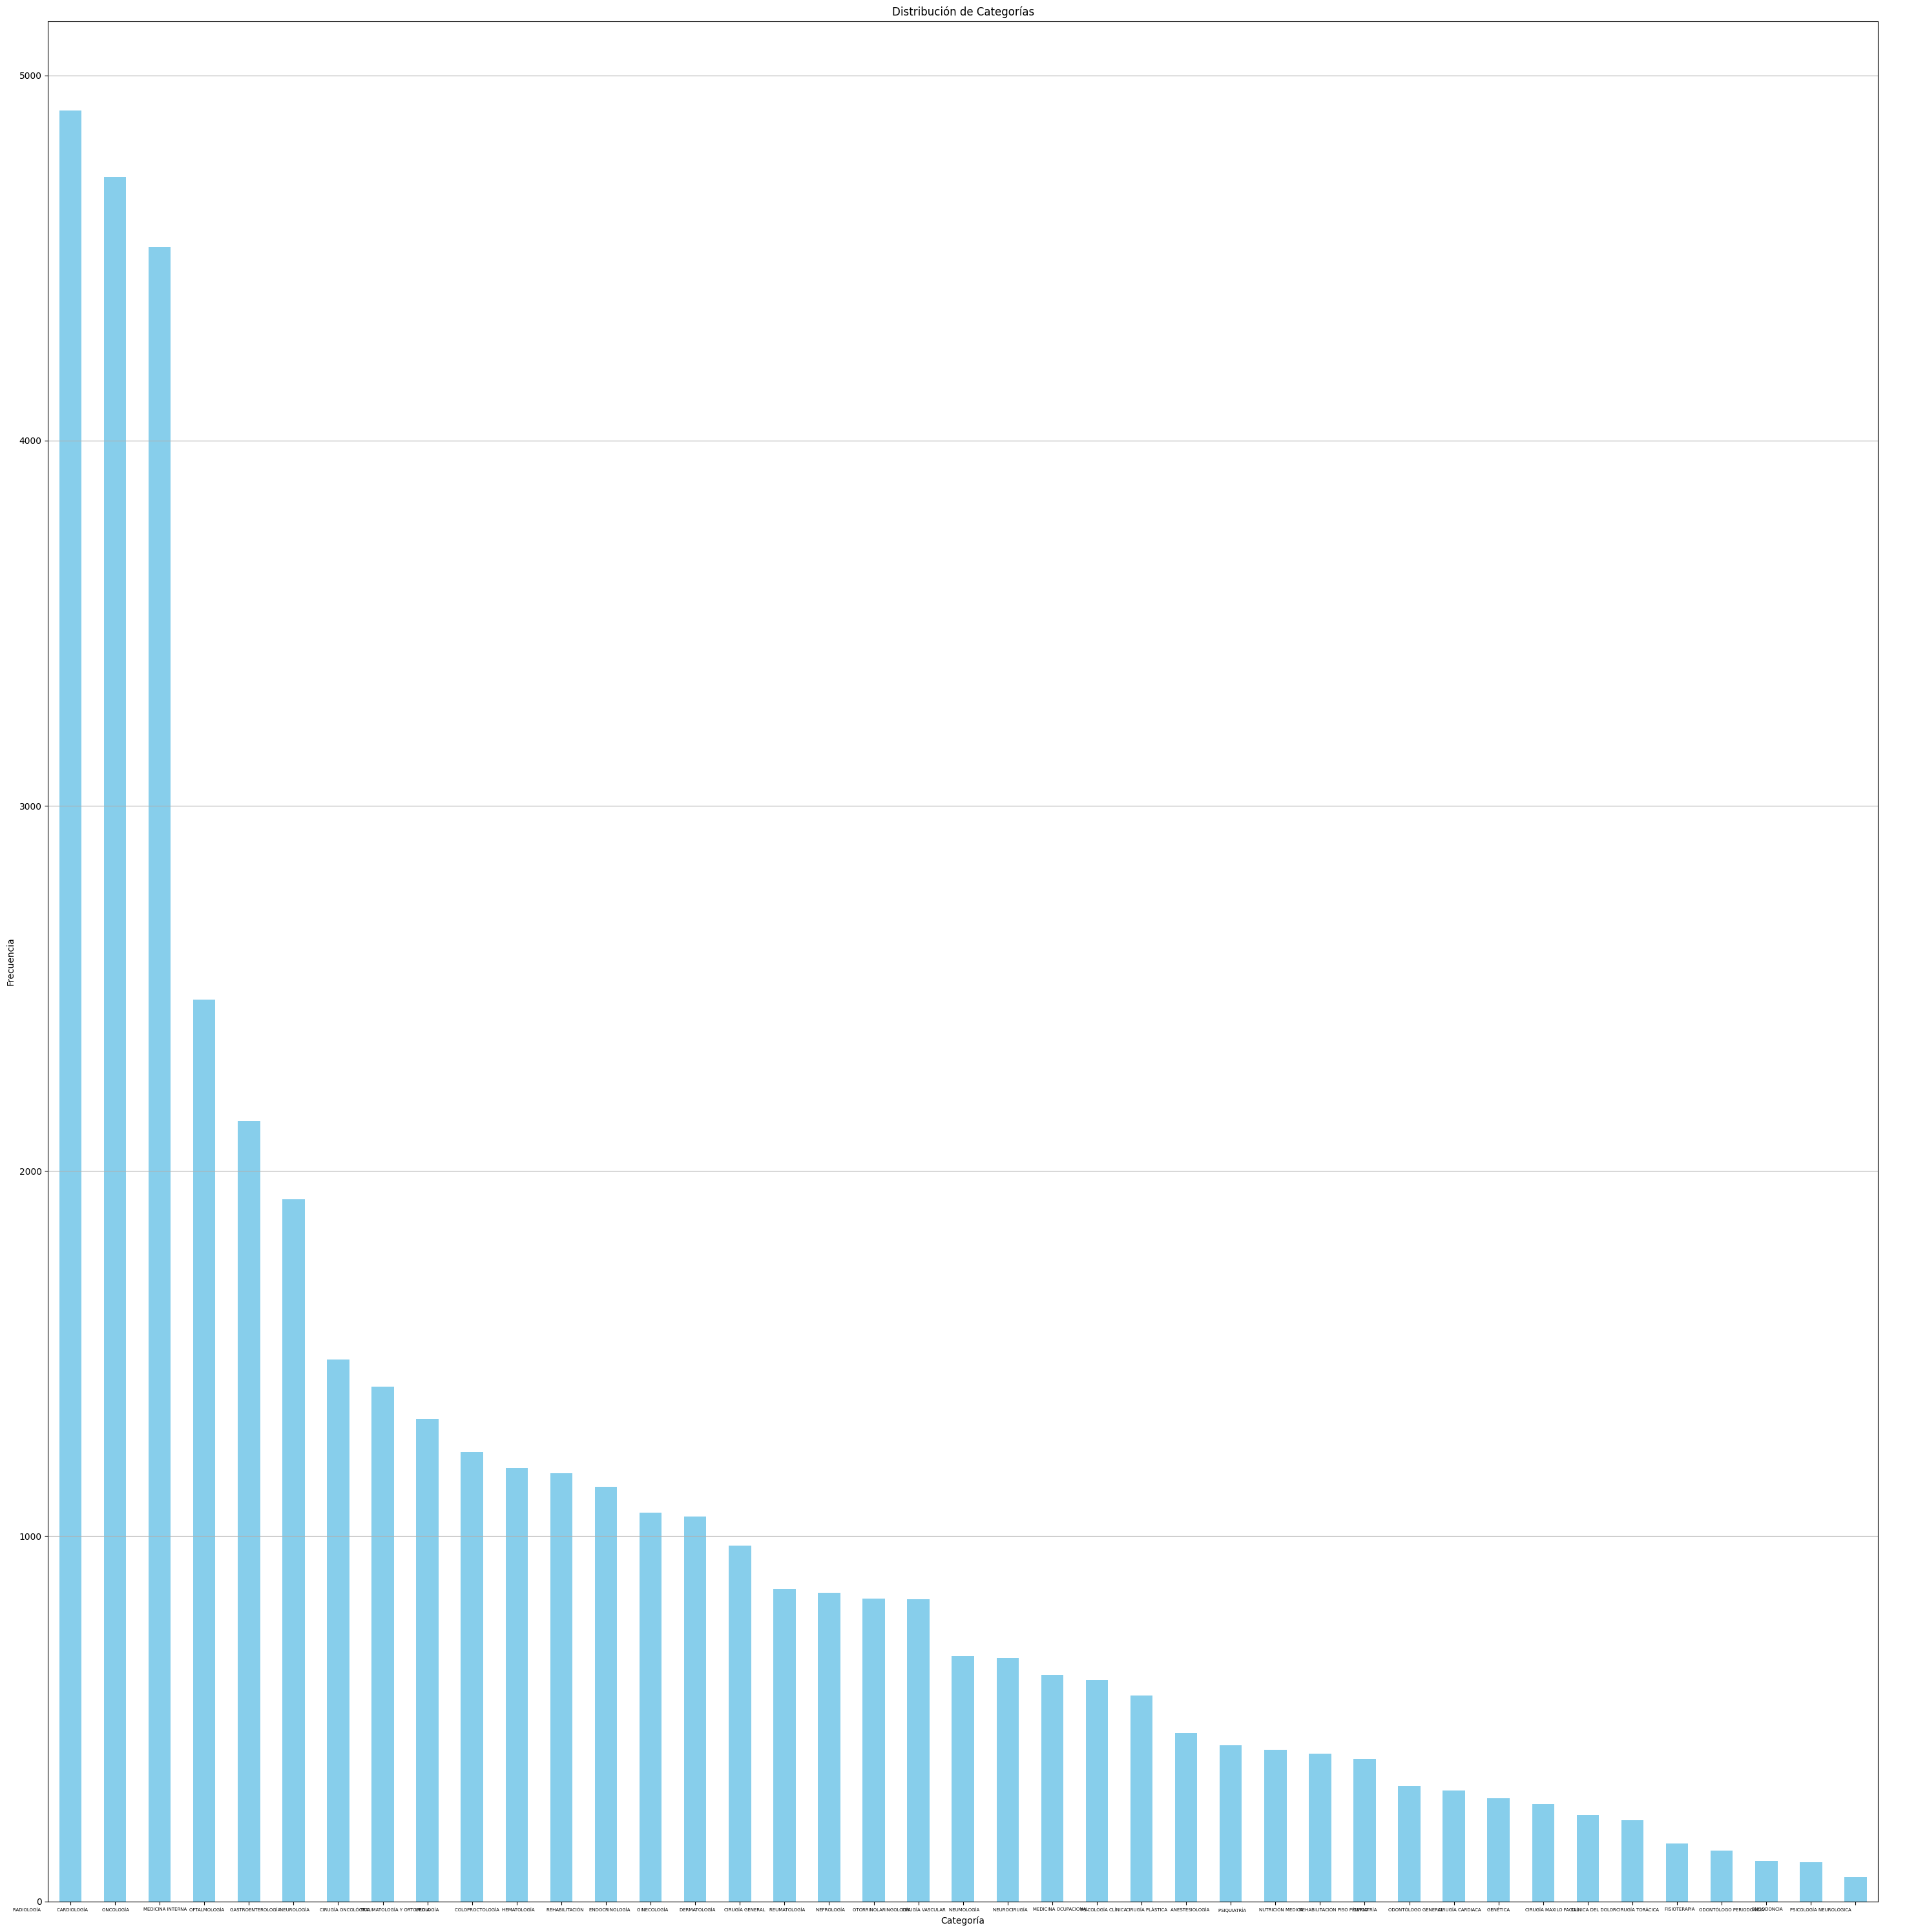

In [106]:
# Crear el gráfico de barras con etiquetas más pequeñas
plt.figure(figsize=(30, 30))
categorias_count.plot(kind='bar', color='skyblue')
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, fontsize=5)  # Ajusta el tamaño de las etiquetas a 10 puntos
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# En el histograma ...................

In [ ]:
# Realizaremos un diagrama de caja y bigote para poder verificar si la edad de los participantes
#estan dentro del grupo y no hayan datos atipicos

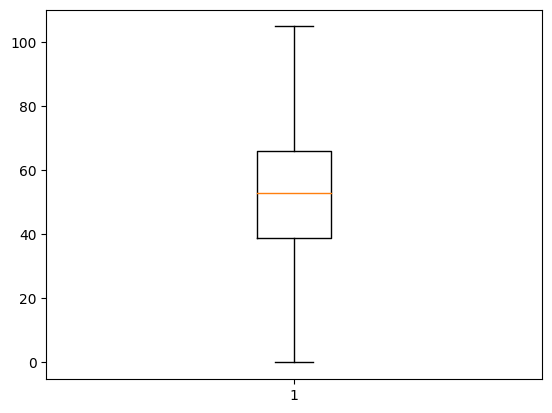

In [107]:
plt.boxplot(df["EDAD"])
plt.show()

In [118]:
categorias_count1= df['GRUPO POBLACIONAL'].value_counts()

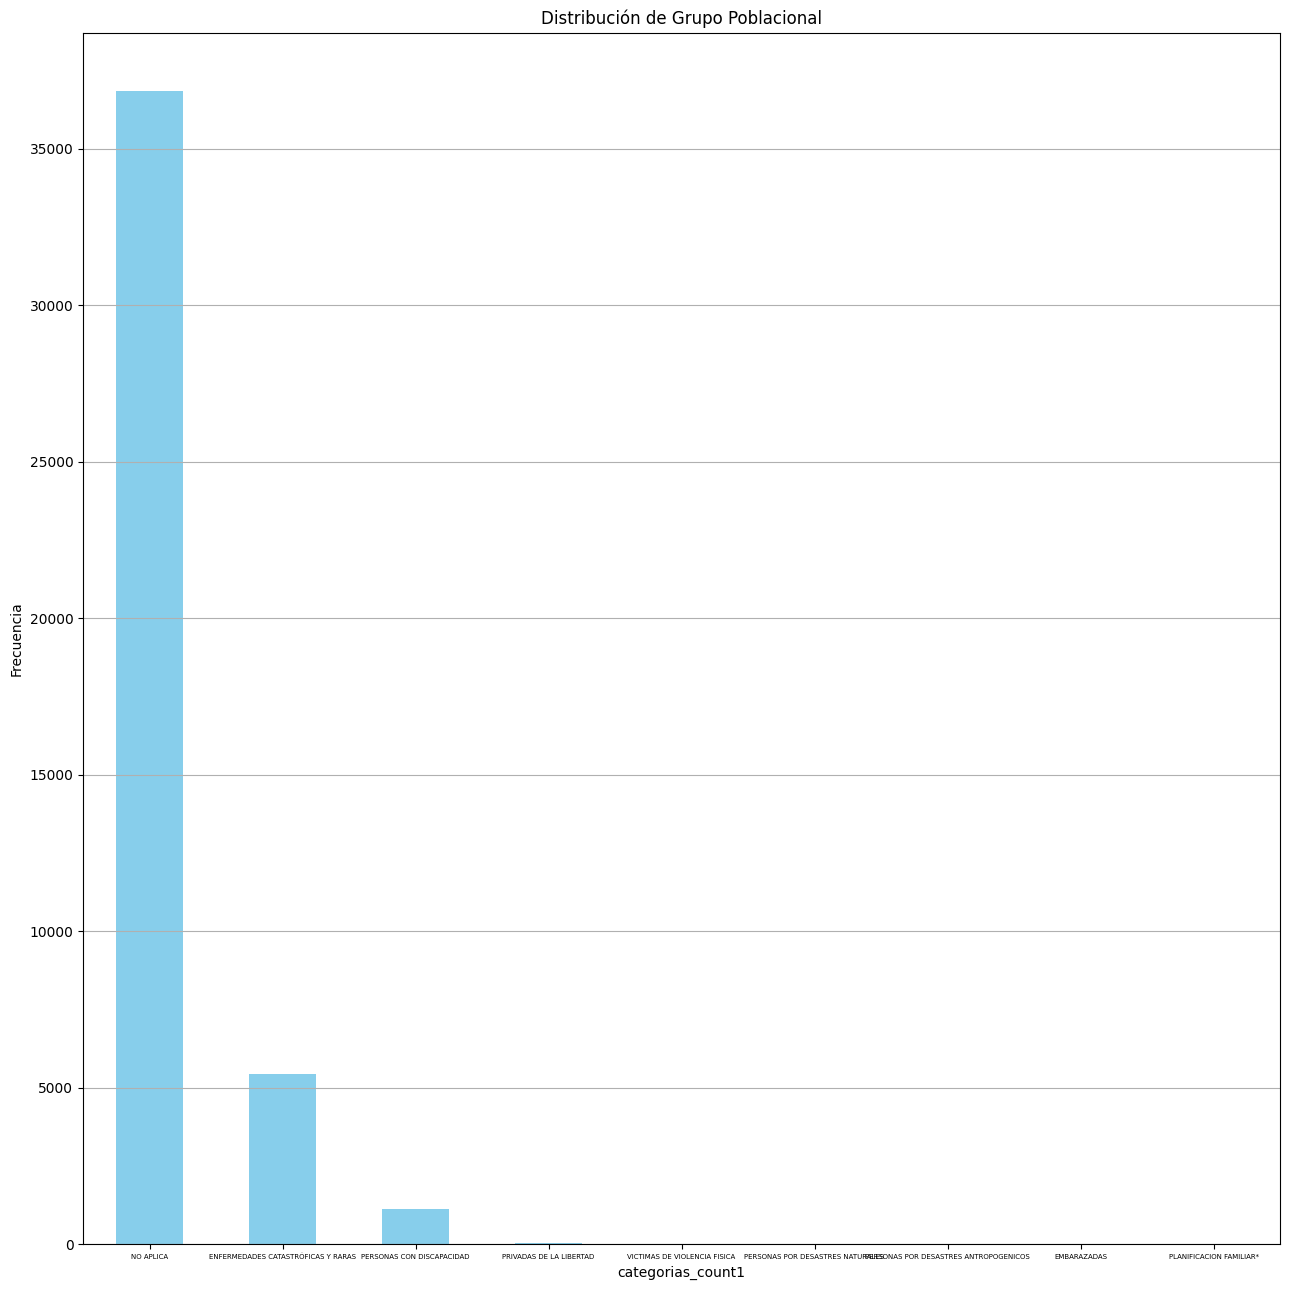

In [154]:
# Crear el gráfico de barras con etiquetas más pequeñas
plt.figure(figsize=(13, 13))
categorias_count1.plot(kind='bar', color='skyblue')
plt.title('Distribución de Grupo Poblacional')
plt.xlabel('categorias_count1')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, fontsize=5)  # Ajusta el tamaño de las etiquetas a 10 puntos
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [127]:
# Aplicar el Label Encoding a la columna 'grupo poblacional'
df['grupo_codificado'] = label_encoder.fit_transform(df['GRUPO POBLACIONAL'])
df['especialidad_codificado'] = label_encoder.fit_transform(df['ESPECIALIDAD'])
df['procedimiento_codificado'] = label_encoder.fit_transform(df['NOMBRE_PROCEDIMIENTPO'])
print(df)

                                            ESPECIALIDAD  \
0      ANESTESIOLOGÍA                                ...   
1      ANESTESIOLOGÍA                                ...   
2      ANESTESIOLOGÍA                                ...   
3      ANESTESIOLOGÍA                                ...   
4      ANESTESIOLOGÍA                                ...   
...                                                  ...   
43512  UROLOGÍA                                      ...   
43513  UROLOGÍA                                      ...   
43514  UROLOGÍA                                      ...   
43515  UROLOGÍA                                      ...   
43516  UROLOGÍA                                      ...   

                                         MEDICO COD_PROCED  \
0      CECILIA CARMITA GARCIA PALOMINO           99203-1     
1      CECILIA CARMITA GARCIA PALOMINO           99203-1     
2      CECILIA CARMITA GARCIA PALOMINO           99203-1     
3      CECILIA CARMITA GARCIA P

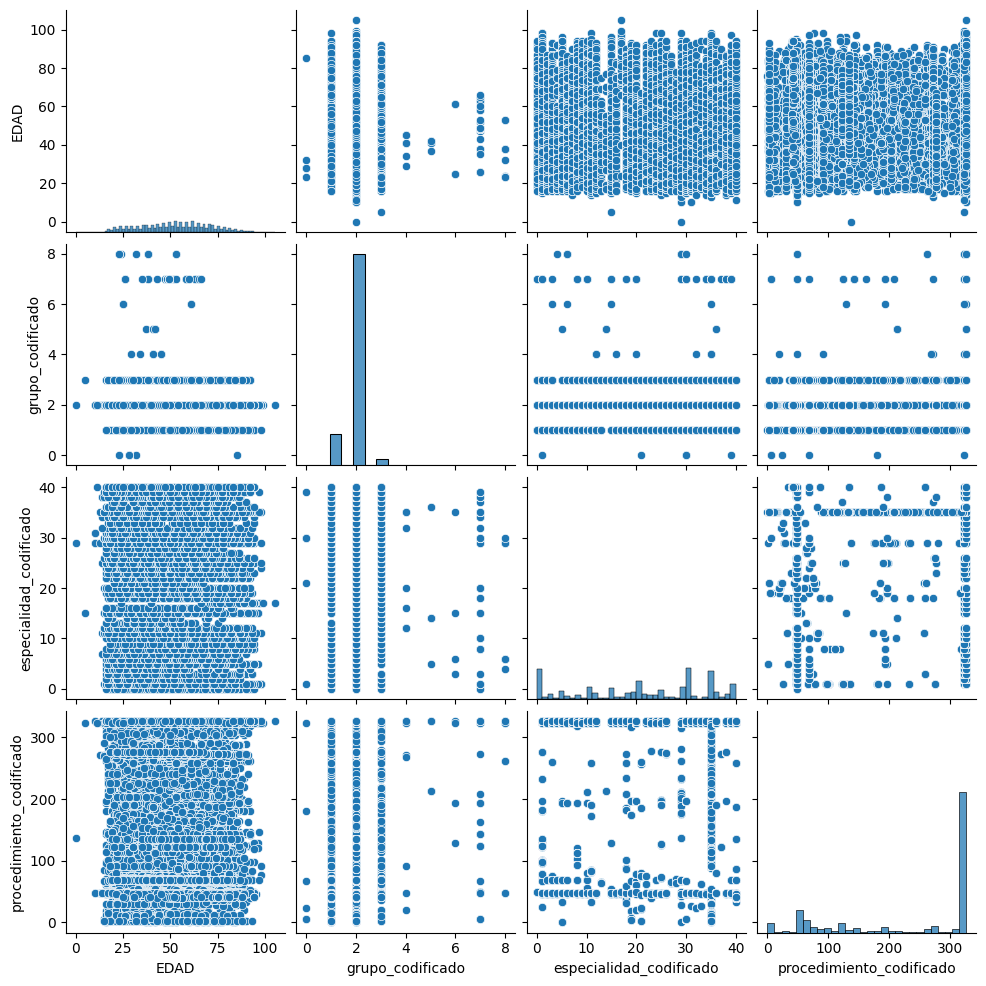

In [159]:
import seaborn as sns

sns.pairplot(df)

<ipython-input-146-a44a5b5c12e7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


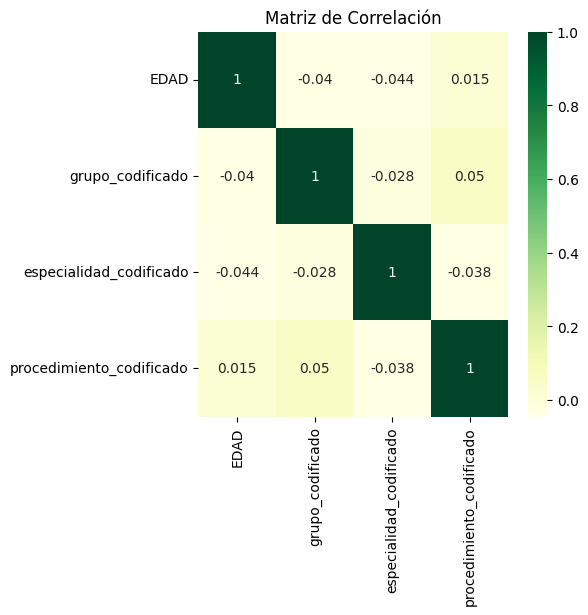

In [146]:
# Realizamos una tabla de correlacion con todas las variables para verificar
#cual de ellas tiene un mayor peso para y relazion entre si para poder trabajar con esas variables

corr=df.corr()
corr.style.background_gradient (cmap = 'coolwarm')

# Crear el heatmap con Seaborn y especificar el esquema de color
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='YlGn')  # Cambia el mapa de color
plt.title('Matriz de Correlación')
plt.show()